In [2]:
import numpy as np                                                 
import matplotlib.pyplot as plt                                                     

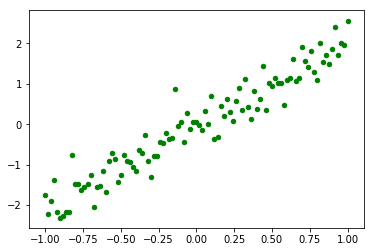

In [14]:
x_train = np.linspace(-1, 1, 101)                                  
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33     

plt.scatter(x_train, y_train, s=20, color="g")                                      
plt.show()  

In [4]:
x_train.shape

(101,)

In [5]:
len(x_train)

101

In [6]:
y_train[:10]

array([-1.89232469, -2.47887795, -1.94633448, -2.10380268, -1.48729788,
       -1.32259075, -2.46826039, -2.40267834, -1.59541883, -2.06218397])

In [7]:
y_train.shape

(101,)

The higher the cost, the worse the model parameter will be. the cost is the sum of the squared differences between the actual and predicted values.
![image](images/03fig07_alt.jpg)

In [26]:
import tensorflow as tf                                                    

learning_rate = 0.01                                                       
training_epochs = 100                                                      

x_train = np.linspace(-1, 1, 101)                                          
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33             

graph = tf.Graph()
with graph.as_default():
    
    X = tf.placeholder(tf.float32, name="X")                                             
    Y = tf.placeholder(tf.float32, name="Y")                                             

    w = tf.Variable(0.0, name="weights")
    
    def model(X, w):                                                       
        return tf.multiply(X, w)

    y_model = model(X, w)                                           
    cost = tf.square(Y - y_model, name="cost")                                                

    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
    # in this part, w is updated in each epoch
    
    init = tf.global_variables_initializer() 
    
with tf.Session(graph=graph) as sess:
    init.run()

    for epoch in range(training_epochs):                                       
        for (x, y) in zip(x_train, y_train): # pairwise x1,y1 = x2,y2                                     
            sess.run(train_op, feed_dict={X: x, Y: y})                             

    w_val = w.eval() # sess.run(w) also works fine!

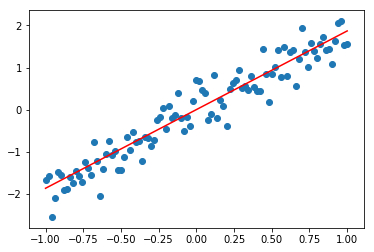

In [27]:
plt.scatter(x_train, y_train)                                              
y_learned = x_train * w_val                                                  
plt.plot(x_train, y_learned, 'r')                                          
plt.show()
# Linear regression estimate 

In [19]:
y_learned.shape

(101,)

In [21]:
x_train.shape

(101,)

In [22]:
x_train

array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ])

you’ve just solved linear regression using TensorFlow! Wi-Fi signal strength degrades with an inverse square law

### POLYNOMIAL MODEL

The nth degree polynomial looks like the following:

`f(x) = wn x^n + ... + w1 x + w0`

When n = 1, a polynomial is simply a linear equation `f(x) = w1 x + w0`.

A polynomial function is a more flexible generalization of a linear function.

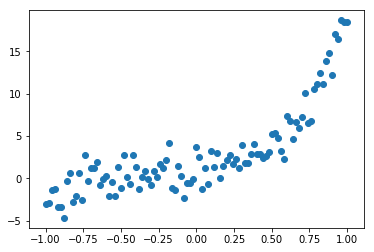

In [28]:
learning_rate = 0.01                                                      

trX = np.linspace(-1, 1, 101)                                              

num_coeffs = 6                                                             
trY_coeffs = [1, 2, 3, 4, 5, 6]                                            
trY = 0

for i in range(num_coeffs):                                                
    trY += trY_coeffs[i] * np.power(trX, i)                                

trY += np.random.randn(*trX.shape) * 1.5 # Sets up raw output data based on a fifth-degree polynomial                          

plt.scatter(trX, trY)                                                      
plt.show()                                 

In [45]:
training_epochs = 10

In [65]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, name="X")                                             
    Y = tf.placeholder(tf.float32, name="Y")                                         

    def model(X, w):                                                           
        terms = []                                                         
        for i in range(num_coeffs):                                            
            term = tf.multiply(w[i], tf.pow(X, i))                             
            terms.append(term)                                     
        return tf.add_n(terms)                                                 

    w = tf.Variable([0.] * num_coeffs, name="parameters")                      
    y_model = model(X, w)                                                

    cost = tf.pow(Y-y_model, 2)                                         
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
    
    init = tf.global_variables_initializer() 

sess = tf.Session(graph=graph)                                                        
sess.run(init)                                                             
                                                 
for epoch in range(training_epochs):                                       
    for (x, y) in zip(trX, trY):                                           
        sess.run(train_op, feed_dict={X: x, Y: y})
        
    if epoch % 5 == 0:
        print(f"At {epoch}. epoch, cost : ", sess.run(cost,feed_dict={X: x, Y: y}))
                                                  
w_val = sess.run(w)                                                     
print(w_val)
sess.close()      

At 0. epoch, cost :  31.874731
At 5. epoch, cost :  0.04862908
[0.8995234 3.7604373 4.032304  3.638647  3.3405406 3.2290344]


In [76]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, name="X")                                             
    Y = tf.placeholder(tf.float32, name="Y")                                         

    def model(X, w):                                        
        terms = []                                                         
        for i in range(num_coeffs):                                            
            term = tf.multiply(w[i], tf.pow(X, i))                             
            terms.append(term)                                    
        return tf.add_n(terms)                                                 

    w = tf.Variable([0.] * num_coeffs, name="parameters")                      
    y_model = model(X, w)                                          

    cost = tf.pow(Y - y_model, 2)                                  
    
    gradients_w = tf.gradients(cost, [w])
    # A list of `sum(dy/dx)` for each x in `[w]`.
    tweak_w_op = tf.assign(w, w - learning_rate * gradients_w[0])
    
    init = tf.global_variables_initializer() 

sess = tf.Session(graph=graph)                                                        
sess.run(init)                                                             
                                                 
for epoch in range(training_epochs):                                       
    for (x, y) in zip(trX, trY):                                           
        sess.run(tweak_w_op, feed_dict={X: x, Y: y})
        
    if epoch % 5 == 0:
        print(f"At {epoch}. epoch, cost : ", sess.run(cost,feed_dict={X: x, Y: y}))
                                                  
w_val = sess.run(w)                                                 
print(w_val)
sess.close()

At 0. epoch, cost :  31.874731
At 5. epoch, cost :  0.04862908
[0.8995234 3.7604373 4.032304  3.638647  3.3405406 3.2290344]


In [104]:
training_epochs = 10

In [125]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, name="X")                                             
    Y = tf.placeholder(tf.float32, name="Y")                                         

    def model(X, w):                                        
        return tf.multiply(w, X**2)                             

    w = tf.Variable(1., name="parameters")                      
    y_model = model(X, w)                                          

    cost = tf.pow(Y - y_model, 2)                                  
    
    gradients_w = tf.gradients(cost, [w])
    # cost derivation = -2 * (Y- w * x**2) * x**2
    # A list of `sum(dy/dw)` for each w in `[w]`. 
    # w cinsinden turev aliniyor!
    
    #tweak_w_op = tf.assign(w, w - learning_rate * gradients_w[0])
    
    init = tf.global_variables_initializer() 

sess = tf.Session(graph=graph)                                                        
sess.run(init)                                                       
                                                 
#sess.run(tweak_w_op, feed_dict={X: -1.0, Y: -3.0}) # w is updated here! so you can skip this 

print(sess.run(gradients_w, feed_dict={X: -1.0, Y: -3.0}))

w_val = sess.run(w)                                                 
print(w_val)

sess.close()

[8.0]
1.0


In [128]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, name="X")                                             
    Y = tf.placeholder(tf.float32, name="Y")                                         

    def model(X, w):                                        
        return tf.multiply(w, X**2)                             

    w = tf.Variable(0., name="parameters")                      
    y_model = model(X, w)                                          

    cost = tf.pow(Y - y_model, 2)                                  
    
    gradients_w = tf.gradients(cost, [X])
    # cost derivation X cinsinden bu da = -2 * (Y - X**2 * w) * 2Xw
    # A list of `sum(dy/dw)` for each w in `[w]`. 
    # X cinsinden turev aliniyor!
    
    init = tf.global_variables_initializer() 

sess = tf.Session(graph=graph)                                                        
sess.run(init)                                                       
                                                 
print(sess.run(gradients_w, feed_dict={X: -1.0, Y: -3.0}))

w_val = sess.run(w)                                                 
print(w_val)

sess.close()

[-0.0]
0.0


In [69]:
trX

array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ])

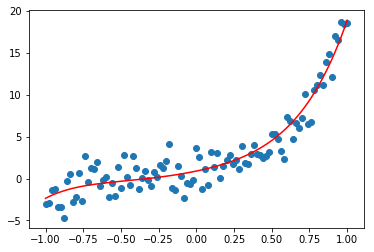

In [47]:
plt.scatter(trX, trY)

trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)                                    
    
    # w0
    # w1 * trX^1
    # w2 * trX^2
    # w3 * trX^3
    # w4 * trX^4
    # w5 * trX^5
    # trY2
    
plt.plot(trX, trY2, 'r')                           
plt.show()
#  The best-fit curve smoothly aligns with the nonlinear data

In [33]:
trX.shape

(101,)

In [34]:
trY2.shape

(101,)

In [35]:
trX.shape

(101,)

In [36]:
w_val.shape

(6,)

### REGULARIZATION

A Python library called scikit-learn supports many useful data-preprocessing algorithms. You can call a function in scikit-learn to do exactly what listing 3.4 achieves. Can you find this function on the library’s documentation? Hint: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection.

ANSWER

It’s called sklearn.model_selection.train_test_split.

In [77]:
>>> import numpy as np
>>> from sklearn.model_selection import train_test_split
>>> X, y = np.arange(10).reshape((5, 2)), range(5)
>>> print(X)
>>> print(list(y))
>>>
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)
...
>>> print(X_train)
>>> print(y_train)
>>> print(X_test)
>>> print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0, 1, 2, 3, 4]
[[4 5]
 [0 1]
 [6 7]]
[2, 0, 3]
[[2 3]
 [8 9]]
[1, 4]


In [78]:
>>> train_test_split(y, shuffle=False)


[[0, 1, 2], [3, 4]]

In [79]:
def split_dataset(x_dataset, y_dataset, ratio):                
    
    arr = np.arange(x_dataset.size)                            
    np.random.shuffle(arr)                                     
    num_train = int(ratio * x_dataset.size)   
    
    x_train = x_dataset[arr[0:num_train]]                      
    x_test = x_dataset[arr[num_train:x_dataset.size]]          
    y_train = y_dataset[arr[0:num_train]]                      
    y_test = y_dataset[arr[num_train:x_dataset.size]]          
    
    return x_train, x_test, y_train, y_test

In [86]:
learning_rate = 0.001                                                        
training_epochs = 1000                                                       
reg_lambda = 0.                                                              

# Creates a fake dataset, y = x2
x_dataset = np.linspace(-1, 1, 100)                                          
                                                                             
num_coeffs = 9                                                               
y_dataset_params = [0.] * num_coeffs                                         
y_dataset_params[2] = 1                                                      
y_dataset = 0                                                                
for i in range(num_coeffs):                                                  
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)                
y_dataset += np.random.randn(*x_dataset.shape) * 0.3                         

#  Splits the dataset into 70% training and 30% testing
(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

X = tf.placeholder(tf.float32)                                               
Y = tf.placeholder(tf.float32)                                               

def model(X, w):                                                             
    terms = []                                                               
    for i in range(num_coeffs):                                              
        term = tf.multiply(w[i], tf.pow(X, i))                               
        terms.append(term)                                                   
    return tf.add_n(terms)                                                   

w = tf.Variable([0.] * num_coeffs, name="parameters")                        
y_model = model(X, w)                                 

# Defines the regularized cost function
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)),                    
                     tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))),  
              2*x_train.size)                                                
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)   
          # gradients_w = tf.gradients(cost, [w])
          # GradientDescentOptimizer takes learning_rate to update the variable w == tf.assign(w, w - learning_rate * gradients_w[0])
        
sess = tf.Session()                                                          
init = tf.global_variables_initializer()                                     
sess.run(init)                                                               

for reg_lambda in np.linspace(0,1,100):                                      
    for epoch in range(training_epochs):                                     
        sess.run(train_op, feed_dict={X: x_train, Y: y_train})               
    final_cost = sess.run(cost, feed_dict={X: x_test, Y:y_test})             
    print('reg lambda', reg_lambda)                                          
    print('final cost', final_cost)                                          

w_val = sess.run(w)
sess.close()                                                                 

reg lambda 0.0
final cost 0.023913436
reg lambda 0.010101010101010102
final cost 0.019956613
reg lambda 0.020202020202020204
final cost 0.018788557
reg lambda 0.030303030303030304
final cost 0.018118871
reg lambda 0.04040404040404041
final cost 0.017690059
reg lambda 0.05050505050505051
final cost 0.017419273
reg lambda 0.06060606060606061
final cost 0.017251164
reg lambda 0.07070707070707072
final cost 0.01714692
reg lambda 0.08080808080808081
final cost 0.017080674
reg lambda 0.09090909090909091
final cost 0.017035829
reg lambda 0.10101010101010102
final cost 0.017002087
reg lambda 0.11111111111111112
final cost 0.016973244
reg lambda 0.12121212121212122
final cost 0.01694571
reg lambda 0.13131313131313133
final cost 0.016917532
reg lambda 0.14141414141414144
final cost 0.016887756
reg lambda 0.15151515151515152
final cost 0.016856017
reg lambda 0.16161616161616163
final cost 0.016822299
reg lambda 0.17171717171717174
final cost 0.01678676
reg lambda 0.18181818181818182
final cost 0.

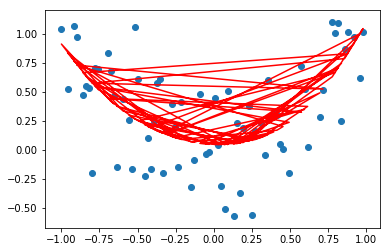

In [94]:
plt.scatter(x_train, y_train)

trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(x_train, i)                                    
    
    # w0
    # w1 * trX^1
    # w2 * trX^2
    # w3 * trX^3
    # w4 * trX^4
    # w5 * trX^5
    # trY2
    
plt.plot(x_train, trY2, 'r')                       
plt.show()

In [95]:
trY2.shape

(70,)

In [101]:
import csv                                                  
import time                                              

def read(filename, date_idx, date_parse, year, bucket=7):

    days_in_year = 365

    freq = {}                                               
    for period in range(0, int(days_in_year / bucket)):
        freq[period] = 0

    with open(filename, 'r') as csvfile:                   
        csvreader = csv.reader(csvfile)
        
        # skip header
        next(csvreader)
        
        for row in csvreader:
            if row[date_idx] == '':
                continue
            t = time.strptime(row[date_idx], date_parse)
            if t.tm_year == year and t.tm_yday < (days_in_year-1):
                freq[int(t.tm_yday / bucket)] += 1

    return freq

freq = read('datasets/311.csv', 0, '%m/%d/%Y', 2014) 

In [126]:
365//7 
# 52 week

52

In [102]:
freq

{0: 10278,
 1: 16752,
 2: 15023,
 3: 16961,
 4: 16568,
 5: 16276,
 6: 14739,
 7: 17424,
 8: 17247,
 9: 16508,
 10: 17192,
 11: 17296,
 12: 17073,
 13: 18252,
 14: 17658,
 15: 16604,
 16: 17604,
 17: 18274,
 18: 17708,
 19: 19276,
 20: 15542,
 21: 19434,
 22: 17733,
 23: 17580,
 24: 18232,
 25: 18809,
 26: 15896,
 27: 18436,
 28: 19021,
 29: 19186,
 30: 18396,
 31: 17901,
 32: 19212,
 33: 18941,
 34: 16145,
 35: 19536,
 36: 18135,
 37: 17970,
 38: 17595,
 39: 18952,
 40: 17257,
 41: 18368,
 42: 18252,
 43: 18246,
 44: 18069,
 45: 17623,
 46: 18332,
 47: 12117,
 48: 17130,
 49: 18217,
 50: 17510,
 51: 11972}